In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(2940, 35)

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df_categ = df.select_dtypes(include='object')
df_num = df.select_dtypes(include='int64')

In [6]:
df_num.std()

Age                         9.133819e+00
DailyRate                   4.034404e+02
DistanceFromHome            8.105485e+00
Education                   1.023991e+00
EmployeeCount               1.110412e-16
EmployeeNumber              8.488492e+02
EnvironmentSatisfaction     1.092896e+00
HourlyRate                  2.032597e+01
JobInvolvement              7.114401e-01
JobLevel                    1.106752e+00
JobSatisfaction             1.102658e+00
MonthlyIncome               4.707156e+03
MonthlyRate                 7.116575e+03
NumCompaniesWorked          2.497584e+00
PercentSalaryHike           3.659315e+00
PerformanceRating           3.607621e-01
RelationshipSatisfaction    1.081025e+00
StandardHours               0.000000e+00
StockOptionLevel            8.519317e-01
TotalWorkingYears           7.779458e+00
TrainingTimesLastYear       1.289051e+00
WorkLifeBalance             7.063556e-01
YearsAtCompany              6.125483e+00
YearsInCurrentRole          3.622521e+00
YearsSinceLastPr

In [7]:
#checking Cardanility
df_cat_value = df_categ.nunique()
df_cat_coulmns = df_categ.columns
df_cat_value

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

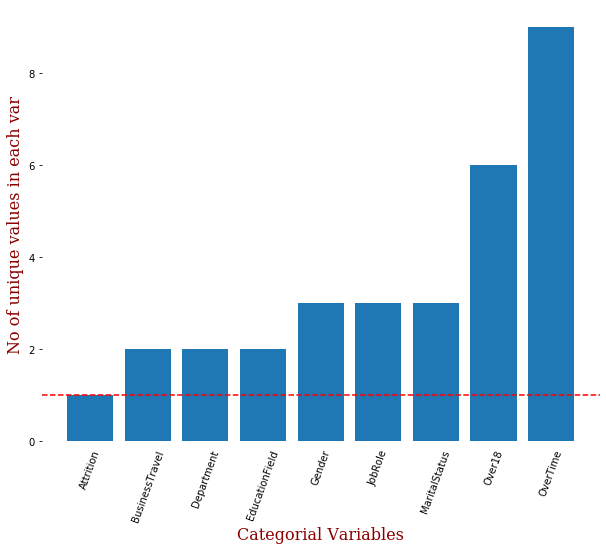

In [8]:
# Visualising Cardanility and zero varience categories
fig = plt.figure(figsize=(10,8))
plt.bar(df_cat_coulmns,df_cat_value.sort_values())
plt.axhline(1,color='r',linestyle='--')
plt.tick_params(bottom=False)
plt.xticks(rotation=70)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.xlabel('Categorial Variables', fontdict= font)
plt.ylabel('No of unique values in each var', fontdict = font)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

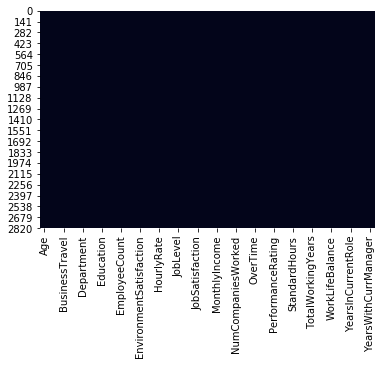

In [10]:
# visualizing missing values
sns.heatmap(df.isnull(),cbar=False)

In [11]:
#Checking Is Data Balance or not?
y = df['Attrition'].map({'Yes':1,'No':0})
pos_count = y.sum()
total_count = y.count()
ratio = (pos_count*100)/total_count
print("Positive:Negative Ratio: {a:.2f}/{b:2.2f}".format(a=ratio,b=(100-ratio)))
# Found that Data is Imbalance

Positive:Negative Ratio: 16.12/83.88


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [13]:
#Performing feature selection
chi2_check = {}
for column in df_categ:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y, df_categ[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

In [14]:
chi_squar_report = pd.DataFrame(chi2_check)
chi_squar_report.head(10)

,Feature,p-value
0,Attrition,0.000000
1,BusinessTravel,0.000000
2,Department,0.000020
3,EducationField,0.000006
4,Gender,0.122148
5,JobRole,0.000000
6,MaritalStatus,0.000000
7,Over18,1.000000
8,OverTime,0.000000


In [15]:
df['Attrition'] = df['Attrition'].map({'Yes': 1,'No': 0})

In [16]:
df['Attrition'].tail()

2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, dtype: int64

In [17]:
x = df_categ['Gender'].value_counts()
x1 = df_categ.groupby('Gender')['Attrition'].value_counts().to_list()[1::2]
x2 = df_categ.groupby('Gender')['Attrition'].value_counts().to_list()[0::2]
x1 = x1[::-1]
x2 = x2[::-1]

Text(0.5, 1.0, 'Negative Attrition')

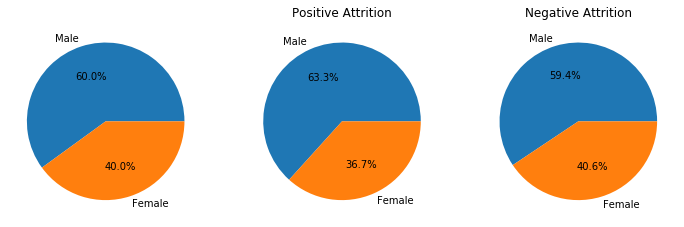

In [18]:
#Understanding Why Gender column is not important for Attrition predication
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].pie(x,autopct='%1.1f%%',labels=['Male','Female'])
ax[1].pie(x1,autopct='%1.1f%%',labels=['Male','Female'])
ax[2].pie(x2,autopct='%1.1f%%',labels=['Male','Female'])
ax[1].set_title('Positive Attrition')
ax[2].set_title('Negative Attrition')

In [19]:
#Dropping Zero varience and feature unimportant column
df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours','Gender'],inplace=True)

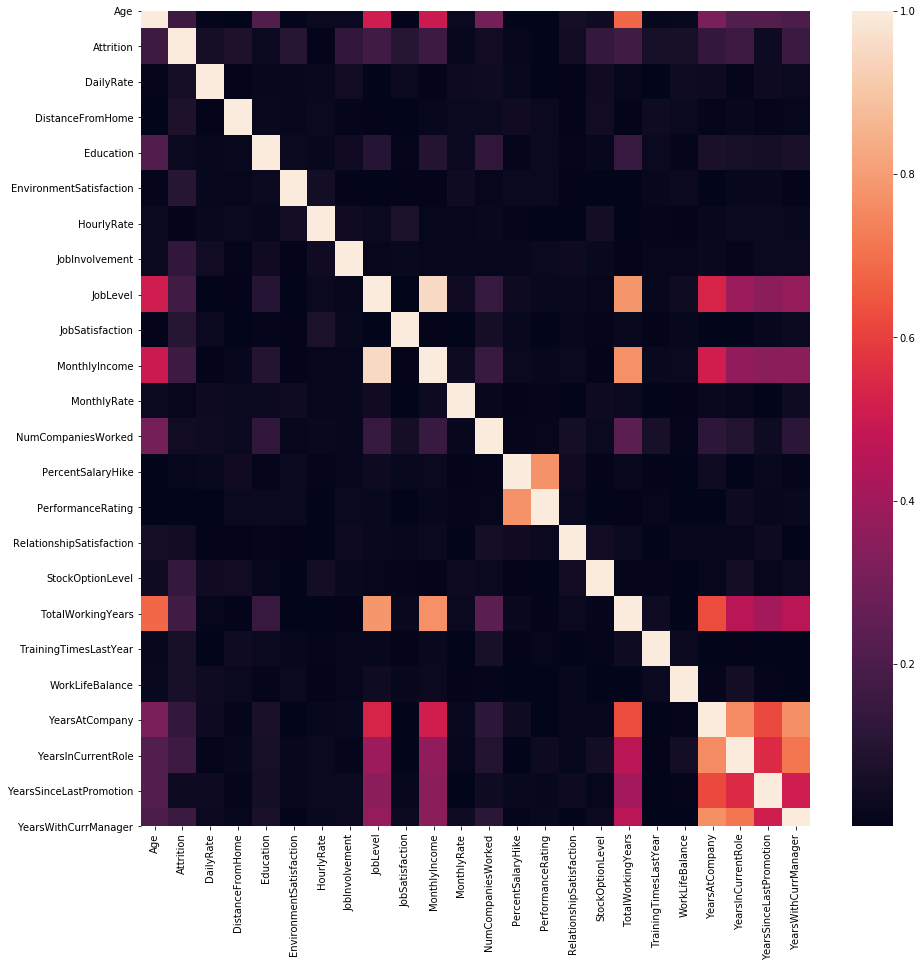

In [20]:
corrmetrix = df.select_dtypes(include=['int64']).corr()
corrmetrix.where(corrmetrix>0,-corrmetrix,inplace=True)
plt.figure(figsize=(15,15))
sns.heatmap(corrmetrix,xticklabels='auto',yticklabels='auto')
plt.show()

In [21]:
corrmetrix_thres = corrmetrix[corrmetrix>0.7]
corrmetrix_thres

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attrition,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourlyRate,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobInvolvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,0.782208,NaN,NaN,NaN,NaN,NaN,NaN
JobSatisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
for column in corrmetrix_thres.columns:
    corrmetrix_na = corrmetrix_thres[column].dropna()
    if(corrmetrix_thres[column].count()>1):
        print(corrmetrix_na)

JobLevel             1.000000
MonthlyIncome        0.950300
TotalWorkingYears    0.782208
Name: JobLevel, dtype: float64
JobLevel             0.950300
MonthlyIncome        1.000000
TotalWorkingYears    0.772893
Name: MonthlyIncome, dtype: float64
PercentSalaryHike    1.00000
PerformanceRating    0.77355
Name: PercentSalaryHike, dtype: float64
PercentSalaryHike    0.77355
PerformanceRating    1.00000
Name: PerformanceRating, dtype: float64
JobLevel             0.782208
MonthlyIncome        0.772893
TotalWorkingYears    1.000000
Name: TotalWorkingYears, dtype: float64
YearsAtCompany          1.000000
YearsInCurrentRole      0.758754
YearsWithCurrManager    0.769212
Name: YearsAtCompany, dtype: float64
YearsAtCompany          0.758754
YearsInCurrentRole      1.000000
YearsWithCurrManager    0.714365
Name: YearsInCurrentRole, dtype: float64
YearsAtCompany          0.769212
YearsInCurrentRole      0.714365
YearsWithCurrManager    1.000000
Name: YearsWithCurrManager, dtype: float64


In [23]:
#Removing features with highly correlated
drop_columns = ['MonthlyIncome','TotalWorkingYears','PercentSalaryHike','YearsInCurrentRole','YearsWithCurrManager']
df.drop(columns=drop_columns,inplace=True)

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,...,24907,1,No,4,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,...,16632,9,No,3,4,1,3,3,2,2


In [25]:
df_num_af_corr = df.select_dtypes(include=['int64'])

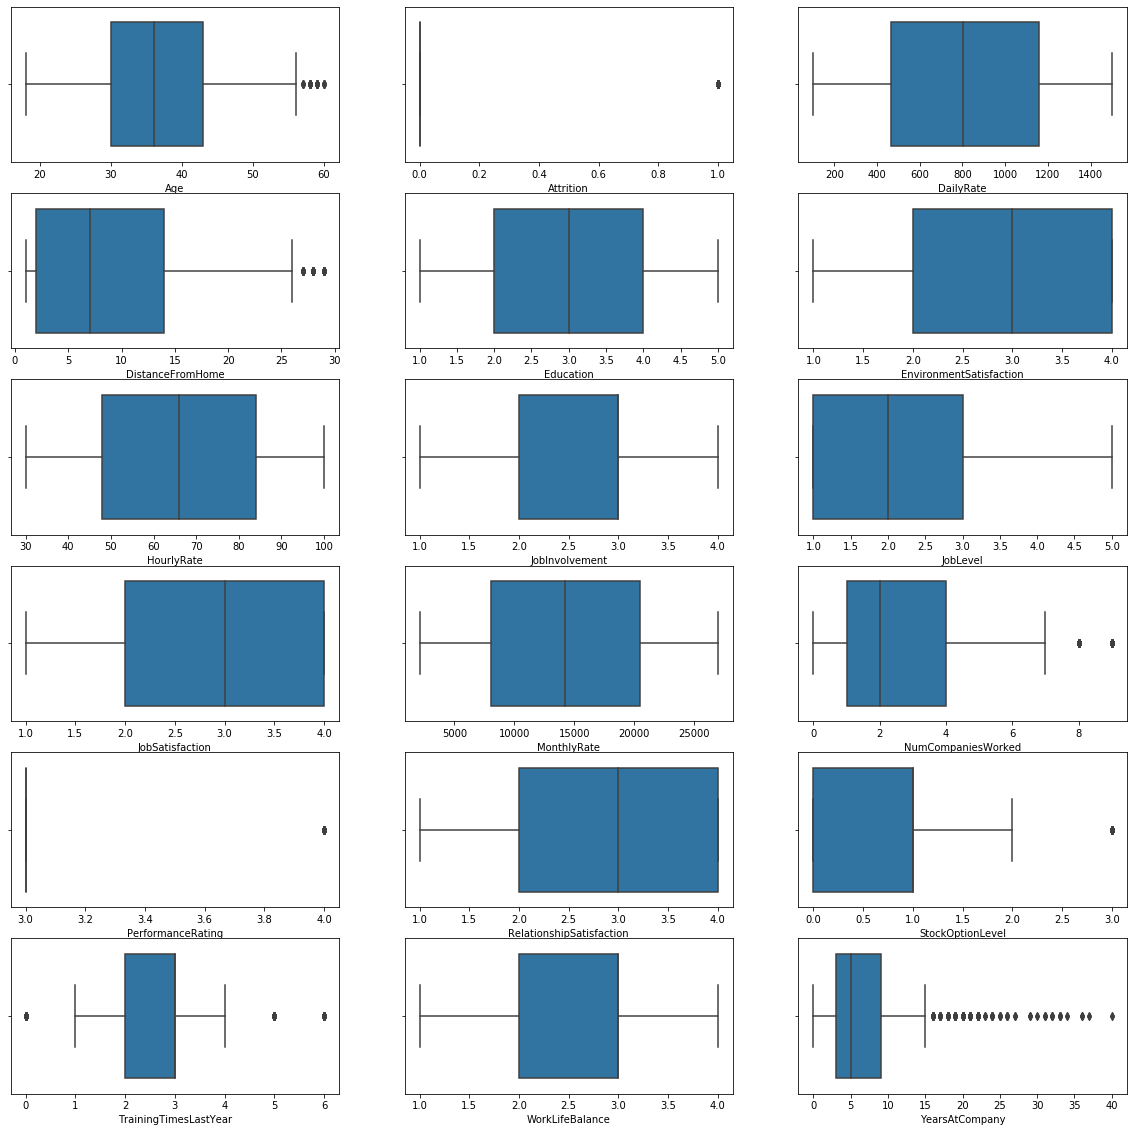

In [26]:
# # Visulazing the whiskers
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(20, 20))
for ax,column in zip(plt.gcf().get_axes(),df_num_af_corr.columns):
    sns.boxplot(df_num_af_corr[column],whis=True,ax=ax)
    ax.set_xlabel(column)

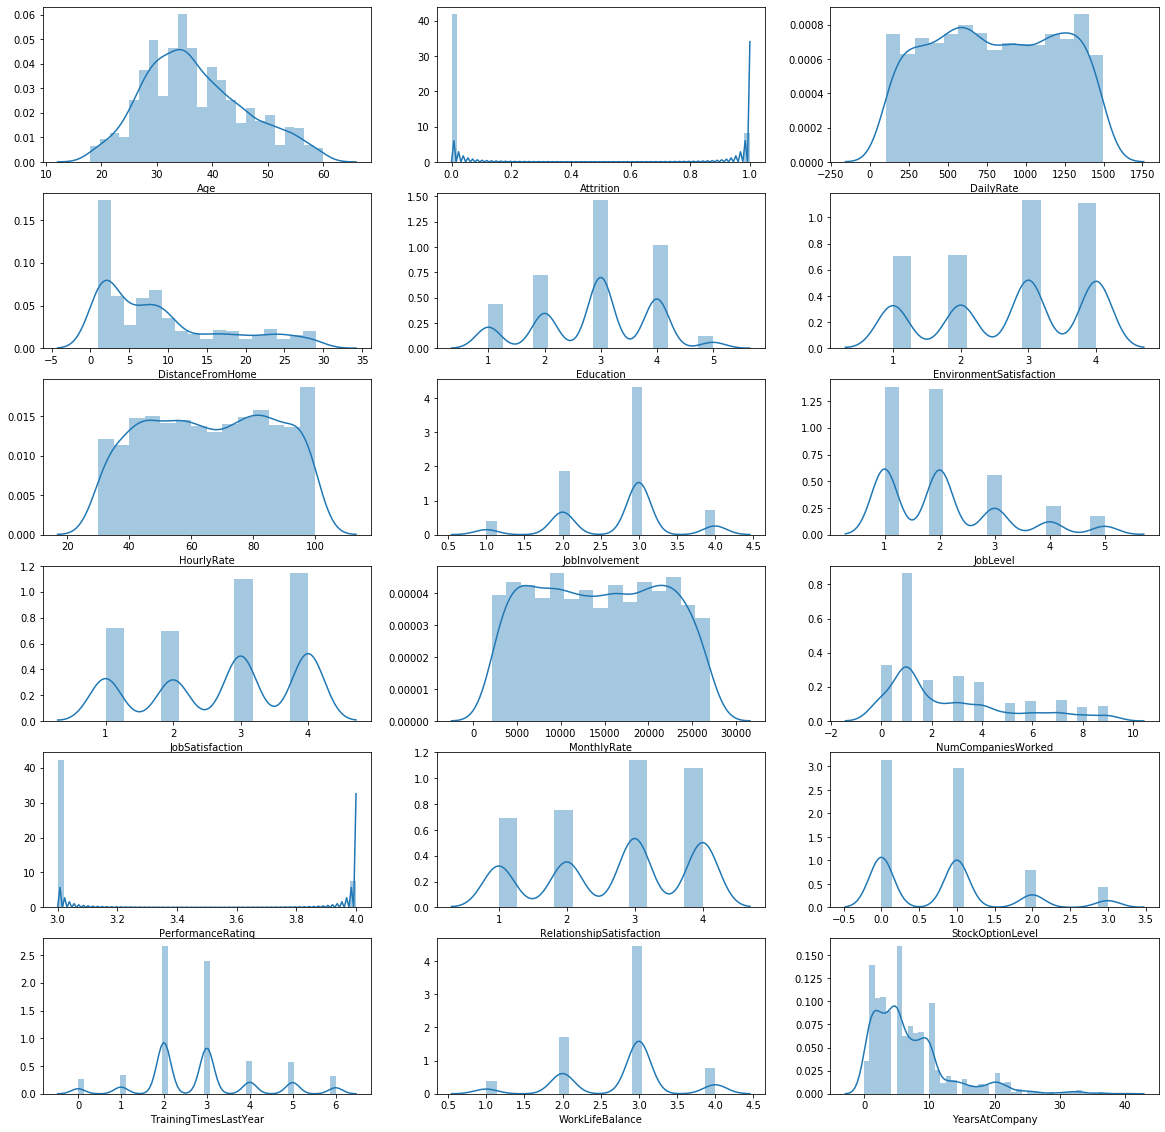

In [27]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(20, 20))
for column, ax in zip(df_num_af_corr.columns, axes.flat):
    sns.distplot(df[column], hist=True, ax=ax)

In [28]:
target = df['Attrition']
df.drop(columns=['Attrition'],inplace=True)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,3,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,2,...,24907,1,No,4,4,1,3,3,10,1
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,2,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,3,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,3,...,16632,9,No,3,4,1,3,3,2,2


In [29]:
df.to_csv('Raw_Data.csv')
df.shape

(2940, 24)

In [30]:
df_new_cat_columns = df.select_dtypes(include='object').columns
df_new_cat_columns_list = df_new_cat_columns.to_list()
df_new_cat_columns_list

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [31]:
one_hot_encoder = OneHotEncoder(sparse=False)
df_cat_af_ohe = pd.DataFrame(one_hot_encoder.fit_transform(df[df_new_cat_columns]))
df_cat_af_ohe.shape
one_hot_encoder.categories_

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [32]:
df_con_ohe =pd.concat([df,df_cat_af_ohe], axis =1)
df_con_ohe.to_csv('final_dataset.csv')

In [33]:
columns_val = df_con_ohe.columns.to_list()
df_con_ohe.set_axis(columns_val, axis=1 , inplace= True)
df_con_ohe.to_csv('final_dataset1.csv')

In [34]:
df_con_ohe.drop(df_new_cat_columns_list,axis=1, inplace=True)

In [35]:
df_con_ohe.shape

(2940, 44)

In [36]:
training_set, test_set, class_set, test_class_set = train_test_split(df_con_ohe,
                                                                    target,
                                                                    test_size = 0.20, 
                                                                    random_state = 42,
                                                                    stratify = target)

In [37]:
# Cleaning test sets to avoid future warning messages
class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel()

In [38]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [39]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [20,22,24,25,28,30],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 22, 'max_features': 'auto'}
Time taken in grid search:  32.85


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
fit_rf.set_params(criterion = 'gini',
                  bootstrap = True,
                  max_features = 'auto', 
                  max_depth = 22)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 200
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [42]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

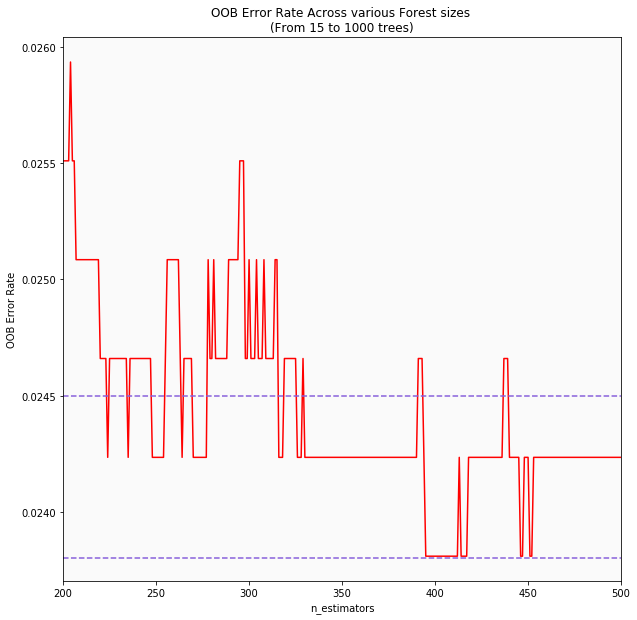

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('#fafafa')
oob_series.plot(kind='line',color = 'red')
plt.axhline(0.0245, color='#875FDB',linestyle='--')
plt.axhline(0.0238, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [46]:
print('OOB Error rate for 900 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 900 trees is: 0.02381


In [48]:
fit_rf.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [49]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [51]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [52]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      name_index[indices[i]],

                      importance[indices[f]]))

In [56]:
name_index = []
for i in df_con_ohe.columns:
    name_index.append(i)
print_var_importance(importances_rf, indices_rf, name_index)

Feature ranking:
1. The feature 'Age' has a Mean Decrease in Impurity of 0.08004
2. The feature 'YearsAtCompany' has a Mean Decrease in Impurity of 0.06742
3. The feature 'DailyRate' has a Mean Decrease in Impurity of 0.06152
4. The feature 'DistanceFromHome' has a Mean Decrease in Impurity of 0.05846
5. The feature 'MonthlyRate' has a Mean Decrease in Impurity of 0.05800
6. The feature 'HourlyRate' has a Mean Decrease in Impurity of 0.05662
7. The feature 'NumCompaniesWorked' has a Mean Decrease in Impurity of 0.04258
8. The feature 'JobLevel' has a Mean Decrease in Impurity of 0.04124
9. The feature '24' has a Mean Decrease in Impurity of 0.03445
10. The feature 'EnvironmentSatisfaction' has a Mean Decrease in Impurity of 0.03426
11. The feature '25' has a Mean Decrease in Impurity of 0.03412
12. The feature 'YearsSinceLastPromotion' has a Mean Decrease in Impurity of 0.03226
13. The feature 'WorkLifeBalance' has a Mean Decrease in Impurity of 0.03141
14. The feature 'JobSatisfaction

In [57]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(name_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(name_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 8))

    #ax.set_axis_facecolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nHR Empoyees Attrition )')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

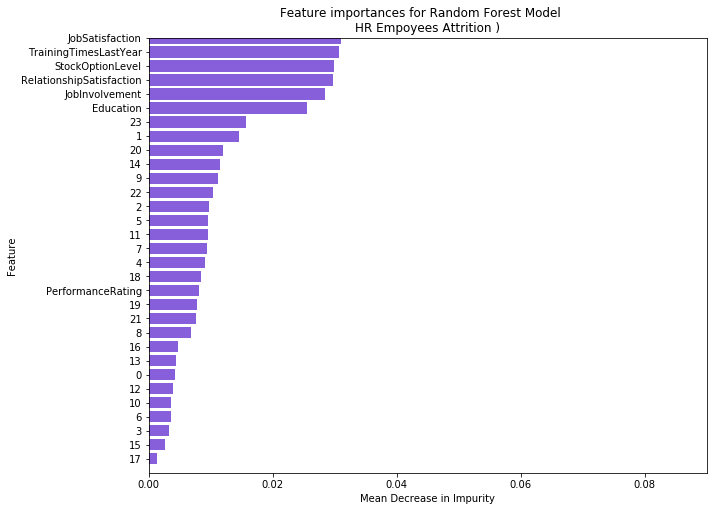

In [58]:
variable_importance_plot(importances_rf, indices_rf, name_index)

In [59]:
predictions_rf = fit_rf.predict(test_set)

In [60]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

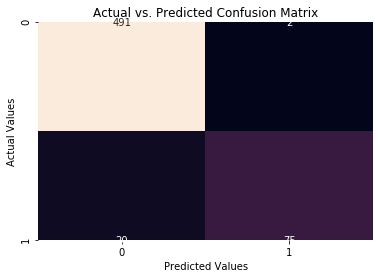

In [61]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [67]:
conf_mat

array([[491,   2],
       [ 20,  75]], dtype=int64)

In [62]:
accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.963


In [63]:
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]

fpr2, tpr2, _ = roc_curve(test_class_set,
                          predictions_prob,
                          pos_label = 1)

In [64]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

In [65]:
auc_rf = auc(fpr2, tpr2)

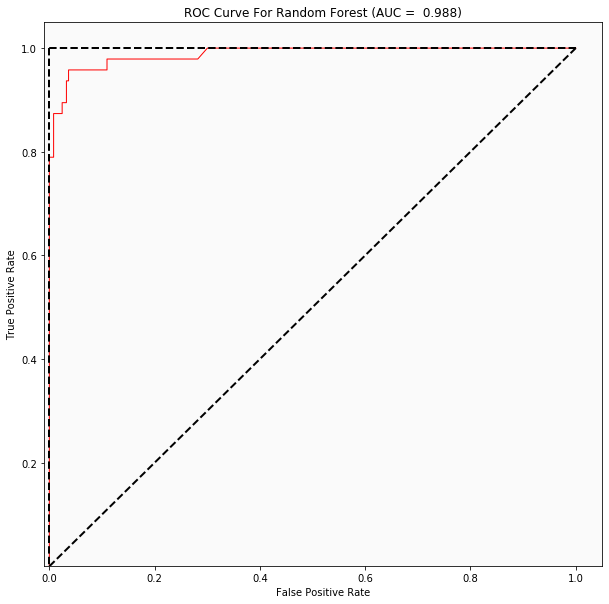

In [66]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))